Mounting Drive

In [ ]:
# # Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing directory IMPORTANT!
# %cd /content/drive/My Drive/DS2500 Project

[Errno 2] No such file or directory: '/content/drive/My Drive/DS2500 Project'
/content


In [ ]:
# %pwd

'/content'

Importing Data

In [1]:
import pandas as pd
import re
from pathlib import Path
import wordcloud as wc
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import imageio
from collections import Counter

pd.set_option('display.max_columns', None)

In [5]:
def read_file(filename, column1, column2):
  #y = '/content/drive/My Drive/DS2500 Project/'+ filename
  #y = filename
  x = pd.read_csv(filename)
  x[column1] = [word.lower() for word in x[column1]]
  x[column2] = [word.lower() for word in x[column2]]
  x[column1] = [re.sub('[^\w\s]','',word) for word in x[column1]]
  x[column2] = [re.sub('[^\w\s]','',word) for word in x[column2]]
  x['key'] = x[column1] + " " + x[column2]

  return x

In [7]:
songs = read_file('top_40.csv', 'TITLE', 'ARTIST')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
song_data = read_file('data.csv', 'name', 'artists')

In [10]:
combined = songs.merge(song_data, left_on=songs['key'], right_on=song_data['key'],how = 'left')


In [11]:
combined.columns

Index(['key_0', 'TITLE', 'ARTIST', 'PEAK', 'key_x', 'acousticness', 'artists',
       'danceability', 'duration_ms', 'energy', 'explicit', 'id',
       'instrumentalness', 'key_y', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [19]:
combined.drop_duplicates(subset ="key_0", 
                     keep = "last", inplace = True)
combined = combined.

,key_0,TITLE,ARTIST,PEAK,key_x,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key_y,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_second
0,blinding lights the weeknd,blinding lights,the weeknd,1,blinding lights the weeknd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dance monkey tones and i,dance monkey,tones and i,1,dance monkey tones and i,0.6920,tones and i,0.824,209438.0,0.588,0.0,2XU0oxnq2qxCpomAAuJY8K,0.000104,dance monkey tones and i,0.1490,-6.400,0.0,dance monkey,89.0,2019-10-17,0.0924,98.027,0.513,2019.0,209.438
2,roses saint jhn,roses,saint jhn,1,roses saint jhn,0.3420,saint jhn,0.782,173611.0,0.500,1.0,3mRlFZHUyvJbPTlkzg4LyJ,0.000019,roses saint jhn,0.1330,-6.473,0.0,roses,69.0,2018-03-30,0.0611,102.008,0.280,2018.0,173.611
3,rockstar feat roddy ricch dababy roddy ricch,rockstar feat roddy ricch,dababy roddy ricch,1,rockstar feat roddy ricch dababy roddy ricch,0.2470,dababy roddy ricch,0.746,181733.0,0.690,1.0,7ytR5pFWmSjzHJIeQkgog4,0.000000,rockstar feat roddy ricch dababy roddy ricch,0.1010,-7.956,1.0,rockstar feat roddy ricch,91.0,2020-04-17,0.1640,89.977,0.497,2020.0,181.733
7,before you go lewis capaldi,before you go,lewis capaldi,1,before you go lewis capaldi,0.6080,lewis capaldi,0.459,215107.0,0.574,0.0,36NTKWnStUjJeBIPCsS7vz,0.000000,before you go lewis capaldi,0.0885,-4.857,1.0,before you go,5.0,2021-01-22,0.0577,111.881,0.183,2021.0,215.107
8,head heart feat mnek joel corry mnek,head heart feat mnek,joel corry mnek,1,head heart feat mnek joel corry mnek,0.1680,joel corry mnek,0.734,166028.0,0.874,0.0,6cx06DFPPHchuUAcTxznu9,0.000011,head heart feat mnek joel corry mnek,0.0489,-3.158,1.0,head heart feat mnek,91.0,2020-07-03,0.0662,122.953,0.905,2020.0,166.028
10,dont start now dua lipa,dont start now,dua lipa,2,dont start now dua lipa,0.0123,dua lipa,0.793,183290.0,0.793,0.0,3PfIrDoz19wz7qK7tYeu62,0.000000,dont start now dua lipa,0.0951,-4.521,0.0,dont start now,85.0,2020-03-27,0.0830,123.950,0.679,2020.0,183.290
16,someone you loved lewis capaldi,someone you loved,lewis capaldi,1,someone you loved lewis capaldi,0.7510,lewis capaldi,0.501,182173.0,0.405,0.0,5SQpwE1khtbJElHkB25fRC,0.000000,someone you loved lewis capaldi,0.1050,-5.679,1.0,someone you loved,0.0,2021-01-22,0.0320,109.889,0.447,2021.0,182.173
17,the box roddy ricch,the box,roddy ricch,2,the box roddy ricch,0.1040,roddy ricch,0.896,196653.0,0.586,1.0,0nbXyq5TXYPCO7pr3N8S4I,0.000000,the box roddy ricch,0.7900,-6.687,0.0,the box,89.0,2019-12-06,0.0559,116.971,0.642,2019.0,196.653
19,life is good feat drake future drake,life is good feat drake,future drake,3,life is good feat drake future drake,0.0670,future drake,0.795,237918.0,0.574,1.0,1K5KBOgreBi5fkEHvg5ap3,0.000000,life is good feat drake future drake,0.1500,-6.903,0.0,life is good feat drake,78.0,2020-05-15,0.4870,142.053,0.537,2020.0,237.918


PART 1: ANALYZING SONG INFORMATION

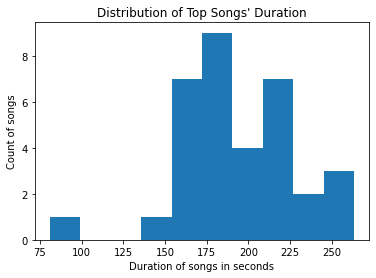

In [13]:
#visualizing the distribution of duration
import matplotlib.pyplot as plt

def duration(df, column, bins = 10):
  df["duration_second"] = df[column] * 0.001
  plt.hist(df["duration_second"])
  plt.xlabel("Duration of songs in seconds")
  plt.ylabel("Count of songs")
  plt.title("Distribution of Top Songs' Duration")

duration(combined, "duration_ms")

In [14]:
def ranking(df, column):
    
    df[column] = df[column].astype(int)
    rank = 1
    last_value = df[column[0]]
    ranked_dict = dict()
    for name in column:
      value = df[name]
    if value_x != value_y:
        rank += 1
    ranked_dict[name] = rank
    value_y = value_x

    df1 = pd.DataFrame(ranked_dict.nlargest(40, column))  # Dataframe of songs
    df1[column_name] = [40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]   # Assign score to songs
    
    return df

test = ranking(combined, 'duration_second')
print(test)


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
def score(lst):
    mydict = {}
    
    for x in lst:
        
        for song in x['TITLE']:
    
            score= x.loc[x['TITLE'] == team, 'Score'].iloc[0]   #Give individual score to song from previous function
            if song in mydict:   # Find cumulative score for each song
                
                mydict[song] += score
            else:          
                mydict[song] = score
                               
    return mydict 

PART 2: READING AND ANALYZING LYRICS


In [16]:
#reads lyric files

def read_lyrics(filename):
    """ Opens and reads file and returns a list of strings """
    with open(filename) as infile:
        lyrics = infile.readlines()
        return lyrics

In [17]:
roses = read_lyrics('roses.txt')
roses

['Roses, I walked in the corner with the body screaming dolo\n',
 'Never sold a bag but look like Pablo in a photo\n',
 "This gon' make 'em feel the way like Tony killed Manolo\n",
 'You already know though, you already know though\n',
 'I walk in the corner with the money, on my finger\n',
 'She might get it popping, I might wife her for the winter\n',
 'I already know, already know, nigga roses\n',
 'All I need is roses\n',
 'Turn up baby, turn up, when I turn it on\n',
 'You know how I get too lit when I turn it on\n',
 "Can't handle my behavior when I turn it on\n",
 "Too fast, never ask, if the life don't last\n",
 'Done been through it all\n',
 'Fuck with a nigga raw, this who you wanna be\n',
 "And I know you won't tell nobody nothing\n",
 "And I know you won't tell nobody no\n",
 'Roses\n',
 'I might pull up flexing on these niggas like aerobics\n',
 'I might tell your girl you cute but balling\n',
 'That shit gorgeous\n',
 'Standing on the table, Rosé, Rosé, fuck the waters\n'

In [ ]:
stop_words =["a", "an", "and", "the", "to", "i", "if", "of", "that", "it",
            "is", "im", "has", "was", "his", "ive", "at", "in", "your", "its",
            "for", "this", "we", "but", "by", "are", "our", "as"]

In [ ]:
#cleans up lyrics

def clean_text(lyrics):
    ''' Inputs a list of strings, removes punctuation, stop words,
    new line characters, and turns words lower case as a list of strings
    '''
    clean_lyrics = []
    for line in lyrics:
        line = re.sub("[^\w\s]", "", line)
        line = line.lower()
        line = line.replace("\n", "")
        
        clean_line = [word for word in line.split(" ") if word not in stop_words]
             
        if clean_line != [""]:
            clean_string = " ".join(clean_line)
            clean_lyrics.append(clean_string)
            
    return clean_lyrics

In [ ]:
clean_roses = clean_text(roses)

In [ ]:
#word cloud generator

def cloud_generator(filename, image=None):
  lyrics = Path(filename).read_text()
  #MASK = imageio.imread(image)
  generate_cloud = wc.WordCloud(width=1000, height=1000)

  cloud = generate_cloud.generate(lyrics)
  plt.imshow(cloud)


In [ ]:
cloud_generator('roses.txt')

In [ ]:
#scores lyrics for sentiment analysis

def score_songs(lyrics, minsub=0.0, maxsub=1.0, minpol=-1.0, maxpol=1.0):
    """ Score each poem for sentiment (polarity/subjectivity) and return as a dictionary (tweet --> (pol/subj)) """
    
    filtered = {}
    for line in lyrics:
        pol, sub = TextBlob(line).sentiment
        if minpol <= pol <= maxpol and minsub <= sub <= maxsub:
            filtered[line] = (pol, sub)
    
    return filtered

In [ ]:
roses_scored = score_songs(clean_roses)

In [ ]:
#generates sentiment analysis graph

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Top 40 Songs Sentiment Analysis')

def polarity_vs_subjectivity(scored_lyrics, DATA_COLOR, LINE_COLOR, LABEL):
    scores = scored_lyrics.values()
    polarity = [x[0] for x in scores]
    subjectivity = [x[1] for x in scores]
    
    sns.scatterplot(x=subjectivity, y=polarity, s=3, color=DATA_COLOR)
    sns.kdeplot(x=subjectivity, y=polarity, color=LINE_COLOR, label=LABEL)

polarity_vs_subjectivity(roses_scored, 'palegoldenrod', 'palegoldenrod', 'Roses -- SAINt JHN')
plt.legend()

In [ ]:
'''
sns.set(font_scale=.5)
    sns.heatmap(total_df, xticklabels=True, yticklabels=True)
    plt.title("Obama's Top 100 Common Words Among Other Presidential Inauguration Speeches")
    plt.xlabel('President')
    plt.ylabel('Words')
    plt.show()
'''